These are the exercise problems from the book Python programming and Numerical methods book:

https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html

# Chapter 16: LEAST SQUARES REGRESSION

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.06-Summary-and-Problems.html#problems

Only those problems that need to be solved in a notebook environment

---

1. Repeat the multivariable calculus derivation of the least squares regression formula for an estimation function $𝑦̂ (𝑥)=𝑎𝑥^2+𝑏𝑥+𝑐$
 where 𝑎,𝑏
, and 𝑐
 are the parameters.

vector derivatives are extensions of single variable derivatives.

For e.g. if differentiate ax w.r.t to x we get a as answer.

Now lets suppose a and x are vectors of size 3

derivative of a * x w.r.t x = [a1x1, a2x2, a3x3] = [a1, a2, a3]

so we get the answer as a vector of a's. We can take advantage of this and simplify calculating derivatives

we know that:

Error (E) = $Σ_{i=1}^{n}(yhat_i - y_i)^2$

so we can use the single variable version ignoring the sum sign. Once we compute using single variables, we can add sigma to each variable.

E = $(yhat - y)^2$

E = $((ax^2 + bx + c) - y)^2$

finding derivative w.r.t a

$\frac{∂E}{∂a} = 2((ax^2 + bx + c) - y)(x^2)$

setting it to 0:

$2((ax^2 + bx + c) - y)(x^2) = 0$

$((ax^2 + bx + c) - y)(x^2) = 0$

$(x^2)(ax^2 + bx + c) - (y)(x^2) = 0$

$(x^2)(ax^2 + bx + c) = x^2y$

$ax^4 + bx^3 + cx^2 = x^2y$

Now we can add sigma's to each xi and yi as we would want to apply this for all points

$a Σ_{i = 1}^{n} xi^4 + b Σ_{i = 1}^{n} xi^3 + c Σ_{i = 1}^{n} xi^2 = Σ_{i = 1}^{n}xi^2 yi$ - i

we can apply the same process for b and c

$\frac{∂E}{∂b} = 2((ax^2 + bx + c) - y)(x)$

setting to 0

$2((ax^2 + bx + c) - y)(x) = 0$

$((ax^2 + bx + c) - y)(x) = 0$

$x(ax^2 + bx + c) - xy = 0$

$ax^3 + bx^2 + cx = xy$

$a Σ_{i = 1}^{n} xi^3 + b Σ_{i = 1}^{n} xi^2 + c Σ_{i = 1}^{n} xi = Σ_{i = 1}^{n} xiyi$ - ii

$\frac{∂E}{∂c} = 2((ax^2 + bx + c) - y)$

setting to 0

$2((ax^2 + bx + c) - y) = 0$

$(ax^2 + bx + c) - y = 0$

$ax^2 + bx + c = y$

$a Σ_{i = 1}^{n} xi^2 + b Σ_{i = 1}^{n} xi + nc = Σ_{i = 1}^{n}yi$ - iii

__note:__ c is a scalar and we need to add to each (xi, yi) combination, which means total points n * c.



useful link to understand least squares derivation from multivariate calculus:

https://www.youtube.com/watch?v=YwZYSTQs-Hk

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Using inverse method derived on pg 281

In [2]:
x = np.random.randn(100)
x.shape

x2 = x**2

# y = ax^2 + bx + c. c is the intercept, a is the coefficient of x^2 and b is the coefficient of x.
y = 3*(x**2) + 4*x + 5

# using the derivation from multivariate calculus and linear algebra, we can derive a,b,c by using y and creating a matrix X
# with columns x^2, x, an array of ones of the size of x to use for the intercept
X = np.vstack([x2, x, np.ones_like(x)]).T
X.shape

# beta coefficients
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([3., 4., 5.])

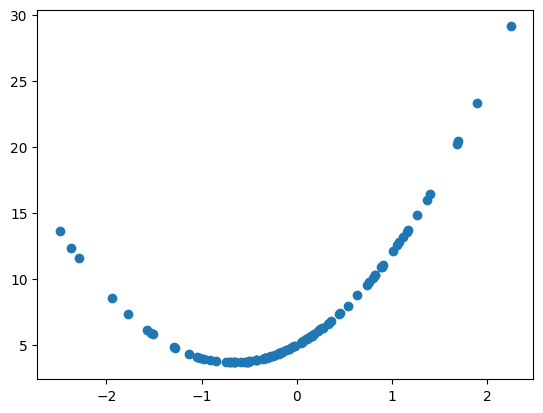

In [3]:
plt.plot(x, y, 'o')
plt.show()

Using the multivariate calculus derivations

In [4]:
x_sum = x.sum()
y_sum = y.sum()
xy_sum = (x*y).sum()
x_4_sum = (x**4).sum()
x_3_sum = (x**3).sum()
x_2_sum = (x**2).sum()
x_2_y_sum = ((x**2)*y).sum()
n = len(x)

print(f'sum xi: {x_sum}')
print(f'sum yi: {y_sum}')
print(f'sum xiyi: {xy_sum}')
print(f'sum xi^4: {x_4_sum}')
print(f'sum xi^3: {x_3_sum}')
print(f'sum xi^2: {x_2_sum}')
print(f'sum xi^2 * yi: {x_2_y_sum}')
print(f'n: {n}')

sum xi: -8.031281480214362
sum yi: 712.4711262601597
sum xiyi: 194.6421134930449
sum xi^4: 229.48280155323525
sum xi^3: -30.443271782413223
sum xi^2: 81.53208406033907
sum xi^2 * yi: 974.3357378317481
n: 100


We have 3 equations:

$a Σ_{i = 1}^{n} xi^4 + b Σ_{i = 1}^{n} xi^3 + c Σ_{i = 1}^{n} xi^2 = Σ_{i = 1}^{n}xi^2 yi$ - i

$a Σ_{i = 1}^{n} xi^3 + b Σ_{i = 1}^{n} xi^2 + c Σ_{i = 1}^{n} xi = Σ_{i = 1}^{n} xiyi$ - ii

$a Σ_{i = 1}^{n} xi^2 + b Σ_{i = 1}^{n} xi + nc = Σ_{i = 1}^{n}yi$ - iii

__For eq (i)__

x_4_sum * (a) + x_3_sum * b + x_2_sum * c = x_2_y_sum

__For eq (ii)__

x_3_sum * a + x_2_sum * b + x_sum * c = -1

__For eq (iii)__

x_2_sum * a + x_sum * b + n * c = y_sum

we can create two matrices A and b and solve the system of equations using the linalg.solve to get the parameters a,b,c.


In [5]:
A = np.array([[x_4_sum, x_3_sum, x_2_sum], [x_3_sum, x_2_sum, x_sum], [x_2_sum, x_sum, n]])
b = np.array([x_2_y_sum, xy_sum, y_sum])

print(A)
print()
print(b)

[[229.48280155 -30.44327178  81.53208406]
 [-30.44327178  81.53208406  -8.03128148]
 [ 81.53208406  -8.03128148 100.        ]]

[974.33573783 194.64211349 712.47112626]


In [6]:
params = np.linalg.solve(A, b)
params

array([3., 4., 5.])

In [7]:
# if matrix A was singular
np.linalg.pinv(A) @ b

array([3., 4., 5.])

In [8]:
yhat = params[0]*(x**2) + params[1]*x + params[2]
yhat

array([12.54703368,  5.47153189,  3.67363015, 10.09995864, 13.72880789,
        9.76102195,  6.6791601 ,  7.98100892,  3.83953477,  5.49165505,
        4.33252545,  6.17113711,  5.26378291,  3.94944969, 12.34984663,
       10.86232087,  4.13887669,  6.31322257,  5.70083834, 20.40941581,
        3.6667016 ,  3.66747089, 12.78989131, 11.58901613,  4.36032354,
       16.00071111,  3.748107  ,  3.84264341,  3.68446877,  3.76056308,
        5.21191224, 13.19256823, 11.06531472,  5.1606077 ,  4.77856159,
        8.56020645,  4.81417941,  3.73700298,  3.68362432, 10.93074953,
        3.83048876,  3.9892777 ,  4.58503179, 23.29196592,  3.95665314,
        7.37119645,  4.91273236,  4.24118852, 13.58079869,  5.65996149,
       10.32278508,  5.43375116,  9.52958113, 29.11815156, 13.62171889,
        5.90592499,  3.66802188,  4.89664069,  4.69431669,  4.08710791,
        3.72192567,  3.73487377, 12.13752341,  4.00389198,  4.34488091,
        5.21251361,  5.69414365,  6.60497296,  4.45561444,  3.67

In [9]:
y

array([12.54703368,  5.47153189,  3.67363015, 10.09995864, 13.72880789,
        9.76102195,  6.6791601 ,  7.98100892,  3.83953477,  5.49165505,
        4.33252545,  6.17113711,  5.26378291,  3.94944969, 12.34984663,
       10.86232087,  4.13887669,  6.31322257,  5.70083834, 20.40941581,
        3.6667016 ,  3.66747089, 12.78989131, 11.58901613,  4.36032354,
       16.00071111,  3.748107  ,  3.84264341,  3.68446877,  3.76056308,
        5.21191224, 13.19256823, 11.06531472,  5.1606077 ,  4.77856159,
        8.56020645,  4.81417941,  3.73700298,  3.68362432, 10.93074953,
        3.83048876,  3.9892777 ,  4.58503179, 23.29196592,  3.95665314,
        7.37119645,  4.91273236,  4.24118852, 13.58079869,  5.65996149,
       10.32278508,  5.43375116,  9.52958113, 29.11815156, 13.62171889,
        5.90592499,  3.66802188,  4.89664069,  4.69431669,  4.08710791,
        3.72192567,  3.73487377, 12.13752341,  4.00389198,  4.34488091,
        5.21251361,  5.69414365,  6.60497296,  4.45561444,  3.67

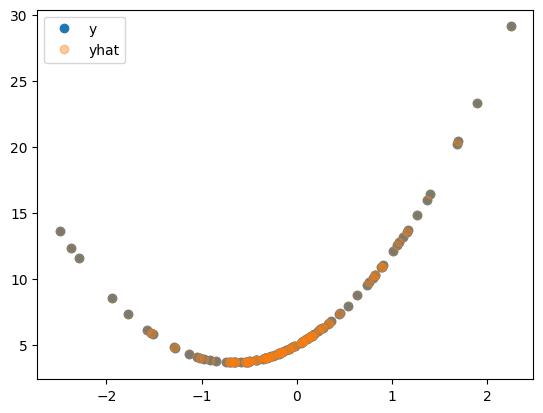

In [10]:
plt.plot(x, y, 'o', label = 'y')
plt.plot(x, yhat, 'o', alpha = 0.4, label = 'yhat')
plt.legend()
plt.show()

---

2. Write a function my_ls_params(f, x, y), where x and y are arrays of the same size containing experimental data, and f is a list with each element a function object to a basis vector of the estimation function. The output argument, beta, should be an array of the parameters of the least squares regression for x, y, and f.

In [11]:
def my_ls_params(f, x, y):

  X = []

  for func in f:
    X.append(func(x))

  X.append(np.ones_like(x))
  X_arr = np.vstack(X).T

  beta = np.linalg.inv(X_arr.T @ X_arr) @ X_arr.T @ y
  return beta

In [12]:
# from the textbook
x = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))
f = [np.sin, np.cos]
beta = my_ls_params(f, x, y)
beta

array([ 2.99400848, -2.02234945,  0.50782386])

---

3. Write a function my_func_fit (x,y), where x and y are column vectors of the same size containing experimental data, and the function returns alpha and beta are the parameters of the estimation function $𝑦̂ (𝑥)=𝛼𝑥^𝛽$.

$yhat = αx^{β}$

taking log on both sides:

$log(yhat) = log(αx^{β})$

$log(yhat) = log(α) + log(x^{β})$

$log(yhat) = log(α) + β * log(x)$

<pre>
let yhat_til = log(yhat)
       α_til = log(α)
       x_til = log(x)

</pre>

so, now we get:

yhat_til = α_til + β * x_til

Now, we can retrieve α_til and β through a linear regression using log y and log x and then we can take an exponentiation of α_til to get α.

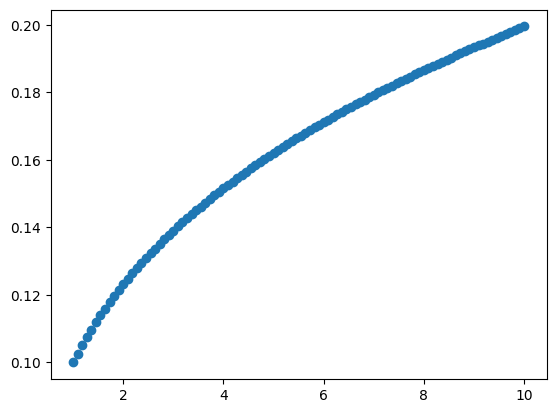

In [13]:
alpha = 0.1
beta = 0.3

x = np.linspace(1, 10, 100)
y = alpha * (x ** (beta))

plt.plot(x, y, 'o')
plt.show()

In [14]:
x_til = np.where(x != 0, np.log(x), x)
y_til = np.where(y != 0, np.log(y), y)

X = np.vstack([x_til, np.ones_like(x_til)]).T
params = np.linalg.inv(X.T @ X) @ X.T @ y_til
beta, alpha = (params[0], params[1])

print(f'beta: {beta}')
print(f'alpha = {np.exp(alpha)}')

beta: 0.3000000000000015
alpha = 0.09999999999999994


we successfully generated the parameters used to create the data. In the textbook on page 287 e see the answers are slightly off as there is a 0. If you change the above example to 0 then you will see that since log(0) does not exist we must leave that value as is, which would take our estimates a little off.

One work around is to add an epsilon value and taking a log of x + epsilon if x = 0.

In [15]:
alpha = 0.1
beta = 0.3
eps = 0.01

x = np.linspace(0, 10, 100)
y = alpha * (x ** (beta))

x_til = np.log(x+eps)
y_til = np.log(y+eps)

X = np.vstack([x_til, np.ones_like(x_til)]).T
params = np.linalg.inv(X.T @ X) @ X.T @ y_til
beta, alpha = (params[0], params[1])

print(f'beta: {beta}')
print(f'alpha = {np.exp(alpha)}')

beta: 0.33446360765949606
alpha = 0.10119677270054978


Here, we are a little off compared to before. You can play around with epsilon to see which one gets you closer.

---

4. Given four data points (𝑥𝑖,𝑦𝑖)
 and the parameters for a cubic polynomial $𝑦̂ (𝑥)=𝑎𝑥^3+𝑏𝑥^2+𝑐𝑥+𝑑$
, what will be the total error associated with the estimation function 𝑦̂ (𝑥)
? Where can we place another data point (x,y) such that no additional error is incurred for the estimation function?

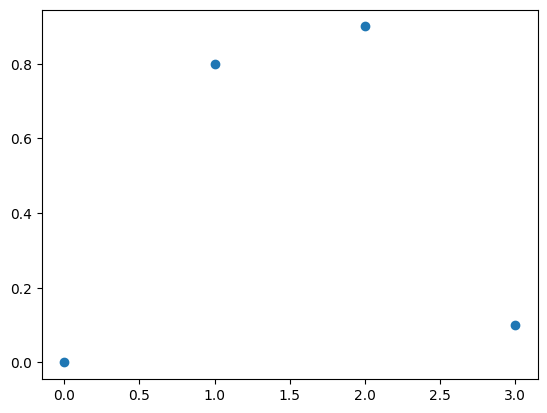

In [16]:
x = np.array([0,1,2,3])
y = np.array([0, 0.8, 0.9, 0.1])

plt.plot(x, y, 'o')
plt.show()

In [17]:
a,b,c,d = np.polyfit(x, y, 3)

print(f'a = {round(a,4)}')
print(f'b = {round(b, 4)}')
print(f'c = {round(c, 4)}')
print(f'd = {round(d, 4)}')

a = -0.0333
b = -0.25
c = 1.0833
d = 0.0


In [21]:
# how polyfit works
X = []

for val in range(1,4)[::-1]:
    X.append(x**val)

X.append(np.ones_like(x))
X = np.array(X).T
X

array([[ 0,  0,  0,  1],
       [ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1]])

In [23]:
np.round(np.linalg.inv(X.T @ X) @ X.T @ y, 4)

array([-0.0333, -0.25  ,  1.0833, -0.    ])

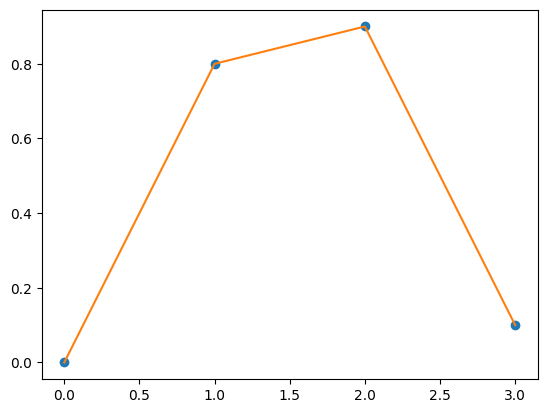

In [24]:
yhat = a*x**3 + b*x**2 + c*x + d

plt.plot(x, y, 'o', label = 'y')
plt.plot(x, yhat, label = 'yhat')
plt.show()

In [25]:
yhat

array([4.4408921e-16, 8.0000000e-01, 9.0000000e-01, 1.0000000e-01])

In [26]:
# we can directly use the retrieved coeffcients to get yhat using polyval
np.polyval(np.polyfit(x, y, 3), x)

array([4.4408921e-16, 8.0000000e-01, 9.0000000e-01, 1.0000000e-01])

In [27]:
round(((yhat - y)**2).sum(), 4)

0.0

In a small dataset any new point placed closer to a specific point is likely to not result in any error.

In [89]:
# sample point
pt_num = 2
pt_new = (x[pt_num], y[pt_num])

print(pt_new)

(2, 0.9)


In [90]:
# creating a point closer to the point
eps = 0.005
pt_alt = (pt_new[0] + eps, pt_new[1] + eps)

print(pt_alt)

(2.005, 0.905)


In [91]:
a*pt_alt[0]**3 + b*pt_alt[0]**2 + c*pt_alt[0] + d

0.8984054125000003

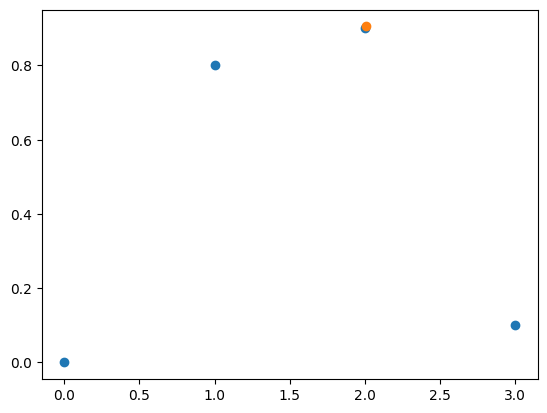

In [92]:
x_alt = np.append(x, pt_alt[0])
y_alt = np.append(y, pt_alt[1])

plt.plot(x, y, 'o')
plt.plot([pt_alt[0]], [pt_alt[1]], 'o')
plt.show()

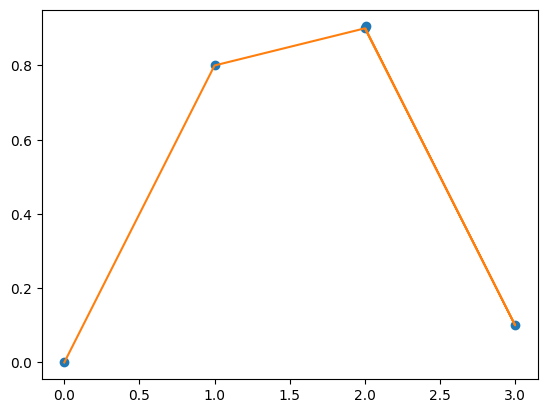

In [93]:
yhat2 = a*x_alt**3 + b*x_alt**2 + c*x_alt + d

plt.plot(x_alt, y_alt, 'o', label = 'y')
plt.plot(x_alt, yhat2, label = 'yhat')
plt.show()

In [94]:
round(((yhat2 - y_alt)**2).sum(), 4)

0.0

Up to pt + epsilon 0.005, no additional error is incurred, after which error starts increasing.

---

5. Write a function my_lin_regression(f, x, y), where f is a list containing function objects to basis functions, and x and y are arrays containing noisy data. Assume that x and y are the same size.

Let an estimation function for the data contained in x and y be defined as 𝑦̂ (𝑥)=𝛽(1)⋅𝑓1(𝑥)+𝛽(2)⋅𝑓2(𝑥)+⋯+𝛽(𝑛)⋅𝑓𝑛(𝑥)
, where n is the length of f. Your function should compute beta according to the least squares regression formula.

Test Case: Note that your solution may vary by a little bit depending on the random numbers generated.

In [95]:
def my_lin_regression(f, x, y):

  X = []

  for func in f:
    X.append(func(x))

  X.append(np.ones_like(x))
  X_arr = np.vstack(X).T

  beta = np.linalg.inv(X_arr.T @ X_arr) @ X_arr.T @ y
  return beta

Test case

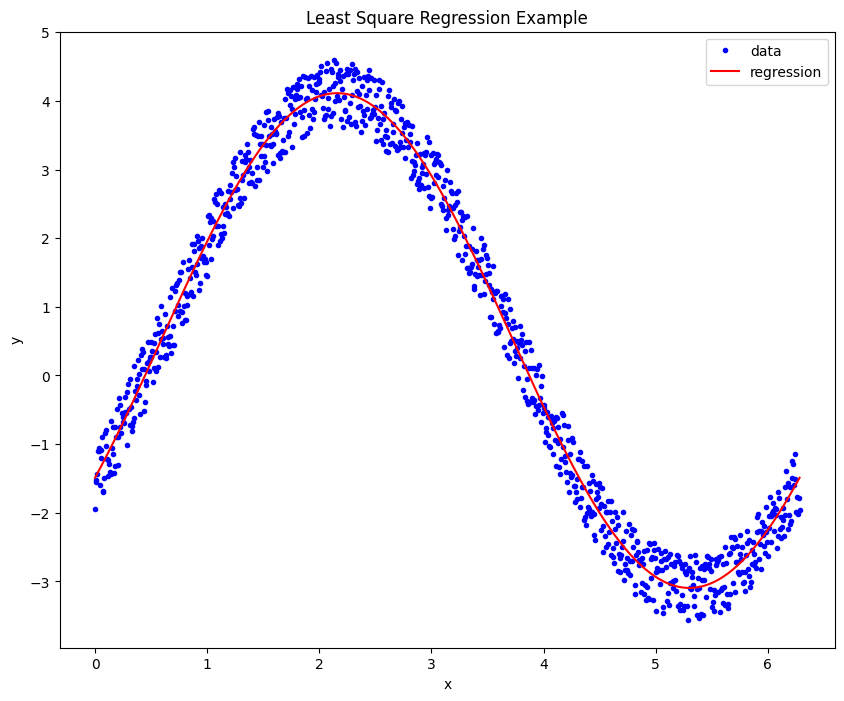

In [96]:
x = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))
f = [np.sin, np.cos]
beta = my_lin_regression(f, x, y)

plt.figure(figsize = (10,8))
plt.plot(x,y,'b.', label = 'data')
plt.plot(x, beta[0]*f[0](x)+beta[1]*f[1](x)+beta[2], 'r', label='regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Square Regression Example')
plt.legend()
plt.show()

---

6. Write a function my_exp_regression (x,y), where x and y are arrays the same size.

Let an estimation function for the data contained in x and y be defined as 𝑦̂ (𝑥)=$𝛼𝑒^{𝛽𝑥}$
. Your function should compute 𝛼
 and 𝛽
 as the solution to the least squares regression formula.

Test Cases: Note that your solution may vary from the test case slightly depending on the random numbers generated.

In [99]:
def my_exp_regression(x, y, eps = 0):

  if  eps > 0:
    y_til = np.log(y + eps)
  else:
    y_til = np.where(y != 0, np.log(y), y)

  X = np.vstack([x, np.ones_like(x)]).T
  params = np.linalg.inv(X.T @ X) @ X.T @ y_til
  beta, alpha = (params[0], np.exp(params[1]))

  return alpha, beta

Test case

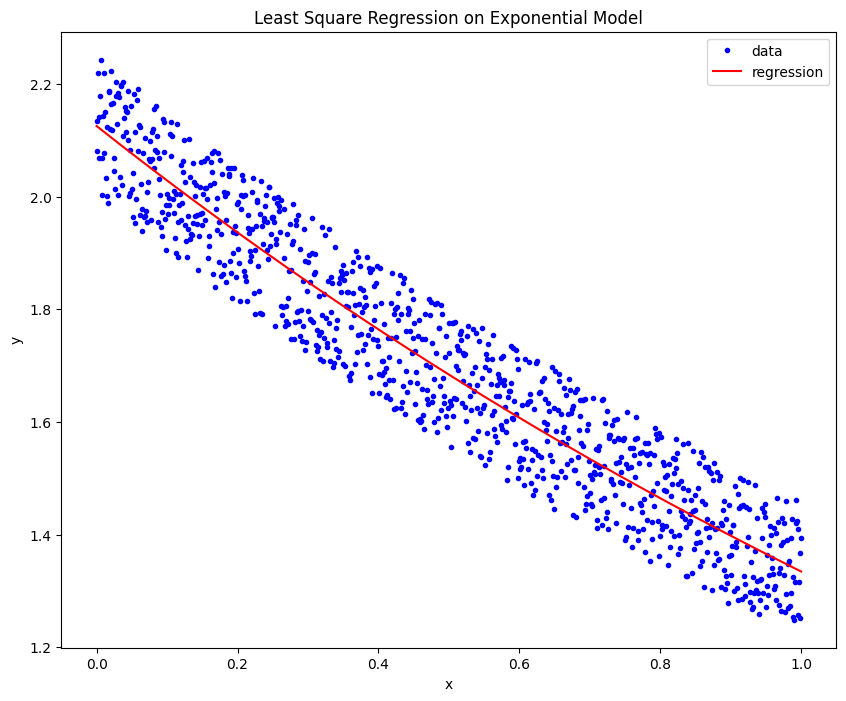

In [100]:
x = np.linspace(0, 1, 1000)
y = 2*np.exp(-0.5*x) + 0.25*np.random.random(len(x))

alpha, beta = my_exp_regression(x, y)

plt.figure(figsize = (10,8))
plt.plot(x,y,'b.', label = 'data')
plt.plot(x, alpha*np.exp(beta*x), 'r', label='regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Square Regression on Exponential Model')
plt.legend()
plt.show()